In [91]:
#Imports
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from astropy.table import Table

In [92]:
#Load TNG
basePath = 'D:/Buhv2020Work/Illustris-3/output'
snapshot_ind = 66 #redshift ?

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table({'Index': [x+1 for x in range(subhalo_grp['count'])]})
for i in range(1, len(subhalo_keys)):
    subhalo_table.add_column(subhalo_grp[str(subhalo_keys[i])], name=str(subhalo_keys[i]))
    
halo_table = Table({'Index': [x+1 for x in range(halo_grp['count'])]})
for i in range(1, len(halo_keys)):
    halo_table.add_column(halo_grp[str(halo_keys[i])], name=str(halo_keys[i]))

#print(subhalo_table)
#print(halo_table)

In [ ]:
#We start out by masking out halos with no subhalohalo_table['GroupFirstSub'])
print(len(halo_table['GroupNsubs']))

#plt.hist(halo_table['GroupLen'], bins=100)
sorted = np.sort(halo_table['GroupLen'])
print(sorted[0:130000])

plt.hist(sorted[0:130000], bins=100)

In [93]:
#Applying basic subahlo cuts to remove junk data:
print(len(subhalo_table))

subhalo_table = subhalo_table[subhalo_table['SubhaloFlag']]
print(len(subhalo_table))
print('Subhalo flag mask complete\n')

subhalo_table = subhalo_table[subhalo_table['SubhaloMass']!=0]
print(len(subhalo_table))
print('Mass Mask complete\n')

subhalo_table = subhalo_table[subhalo_table['SubhaloMassType'][:,4]!=0]
print(len(subhalo_table))
print('Stellar Mass Mask complete \n')

mask = subhalo_table['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask[:,0]
for i in range (1,8):
    photo_mask = photo_mask & mask[:,i]
subhalo_table = subhalo_table[photo_mask]
print(len(subhalo_table))
print('Photo Mask complete \n\n')
pre_masscut = subhalo_table

131761
131349
Subhalo flag mask complete

131349
Mass Mask complete

24619
Stellar Mass Mask complete 

24619
Photo Mask complete 




In [ ]:
subhalomass = np.array(np.log10(subhalo_table["SubhaloMassInHalfRad"]*1e10/0.704))
mask = subhalomass > 10.3
st = subhalo_table[mask]

fig, ax = plt.subplots(4,2)
fig.set_size_inches(16,20)
plt.subplots_adjust(hspace = 0.5)
band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
for bands in range(8):
    mag = st['SubhaloStellarPhotometrics'][:,bands]
    ax[bands%4][bands//4].hist(mag, bins=50)
    ax[bands%4][bands//4].set_xlabel('magnitude in ' + band_names[bands] + " band", fontsize = 16 )
    ax[bands%4][bands//4].set_ylabel('count', fontsize = 16)

plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


"\ncolor_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 10.3)\ncolor_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)\n\ncolor_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 11.3)\ncolor_color(color_color_cut['SubhaloStellarPhotometrics'], 0.5, 0.4)\n\ncolor_color_cut = cut(pre_masscut, 'SubhaloMass', 9)\ncolor_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)\n\n#Color-Density Plots\ndensity_cut = cut(pre_masscut, 'SubhaloMass', 9.5)\ncolor_density(density_cut['SubhaloStellarPhotometrics'], 5, 5, 7)\ncolor_density(density_cut['SubhaloStellarPhotometrics'], 5, 4, 5)\ncolor_density(density_cut['SubhaloStellarPhotometrics'], 4, 4, 7)\ncolor_density(density_cut['SubhaloStellarPhotometrics'], 6, 5, 6)\n"

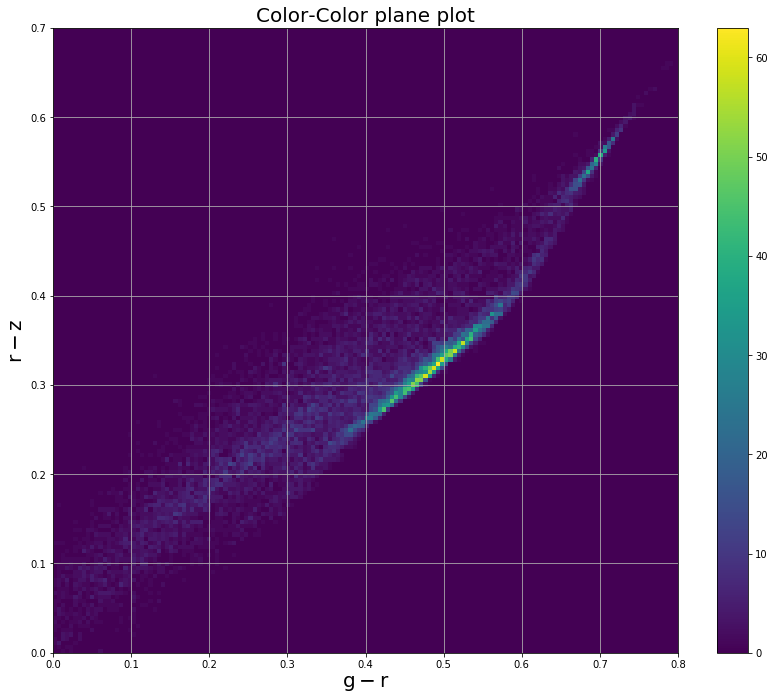

In [21]:
#Color-Color Plots
color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 9.5)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

"""
color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 10.3)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

color_color_cut = cut(pre_masscut, 'SubhaloMassInHalfRad', 11.3)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.5, 0.4)

color_color_cut = cut(pre_masscut, 'SubhaloMass', 9)
color_color(color_color_cut['SubhaloStellarPhotometrics'], 0.0, 0.0)

#Color-Density Plots
density_cut = cut(pre_masscut, 'SubhaloMass', 9.5)
color_density(density_cut['SubhaloStellarPhotometrics'], 5, 5, 7)
color_density(density_cut['SubhaloStellarPhotometrics'], 5, 4, 5)
color_density(density_cut['SubhaloStellarPhotometrics'], 4, 4, 7)
color_density(density_cut['SubhaloStellarPhotometrics'], 6, 5, 6)
"""

In [20]:
def color_color(mag, r1, r2):
    g_minus_r = mag[:,4]-mag[:,5]
    r_minus_z = mag[:,5]-mag[:,7]
    plt.figure(figsize=(14,11.5))
    #heights, rmz,gmr = np.histogram2d(r_minus_z,g_minus_r,bins=150)
    plt.hist2d(g_minus_r,r_minus_z, bins = 150, cmap='viridis', range=[[r1, 0.8], [r2, 0.7]])
    plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
    plt.ylabel("$\mathrm{r-z}$", fontsize = 20)
    plt.title("Color-Color plane plot", fontsize = 20)
    plt.colorbar()
    plt.grid(b=True, which='both', axis='both')
    #print(len(g_minus_r))
    #print(str(len(g_minus_r[g_minus_r>0.5])) + "\n")
    #levels = np.linspace(0, 40,num=4)
    #plt.contour(gmr[0:150],rmz[0:150], heights, levels=levels, 
                #extent=[0,0,0.8,0.7], colors=['red','orange','pink','green'])

In [13]:
def color_density(mag, band1, band2, band3):
    band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
    r = mag[:,band1]
    r_minus_z = mag[:,band2]-mag[:,band3]
    plt.figure(figsize=(8,6))
    heights, gmr, rmz = np.histogram2d(r,r_minus_z,bins=150)
    plt.hist2d(r_minus_z, r, bins = 80, cmap='viridis')#, range=[[0, 0.7], [0, 0.8]])
    plt.xlabel(band_names[band1], fontsize = 20)
    plt.ylabel(band_names[band2]+"-"+band_names[band3], fontsize = 20)
    plt.title("Color Density plot", fontsize = 20)
    plt.colorbar()

In [14]:
def cut(table, field, num):
    subhalomass = np.array(np.log10(table[field]*1e10/0.704))
    mask = subhalomass > num
    return table[mask]

In [140]:
#Select Color Cuts for blue
mag = subhalo_table['SubhaloStellarPhotometrics']
#Cutting for blue
gmr_cut_low = (mag[:,4]-mag[:,5])>0.46
#gmr_cut_high = (mag[:,4]-mag[:,5])<0.48
#rmz_cut_low = (mag[:,5]-mag[:,7])>0.33
rmz_cut_high = (mag[:,5]-mag[:,7])<0.34
subhalo_table_blue = subhalo_table[gmr_cut_low & rmz_cut_high] # & gmr_cut_high & rmz_cut_low ]
subhalomass = np.array(np.log10(subhalo_table_blue["SubhaloMassInHalfRad"]*1e10/0.704))
blue_cut_mass=subhalo_table_blue[subhalomass>9]
#subhalomass = np.array(np.log10(blue_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
#blue_cut_mass=blue_cut_mass[subhalomass<11]

#Cutting for red
gmr_cut_low = (mag[:,4]-mag[:,5])>0.66
#gmr_cut_high = (mag[:,4]-mag[:,5])<0.70
rmz_cut_low = (mag[:,5]-mag[:,7])>0.52
#rmz_cut_high = (mag[:,5]-mag[:,7])<0.54
subhalo_table_red = subhalo_table[gmr_cut_low & rmz_cut_low] #& rmz_cut_high & gmr_cut_high]
subhalomass = np.array(np.log10(subhalo_table_red["SubhaloMassInHalfRad"]*1e10/0.704))
red_cut_mass=subhalo_table_red[subhalomass>9]
#subhalomass = np.array(np.log10(red_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
#red_cut_mass=red_cut_mass[subhalomass<11]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [141]:
print(len(blue_cut_mass))
print(len(red_cut_mass))

1903
710


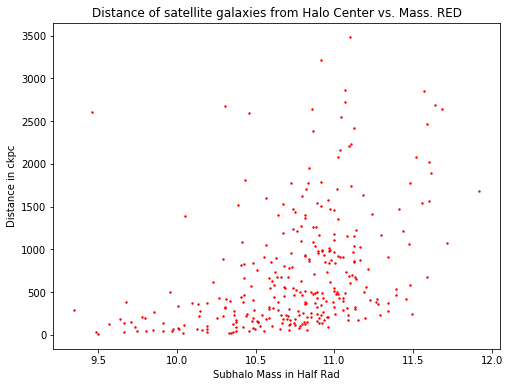

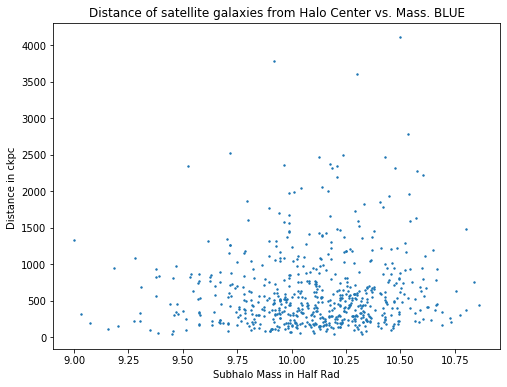

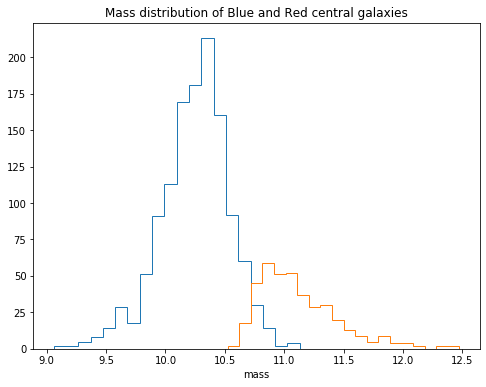

In [142]:
dist = []
mass_sat = []
mass_cen_red = []
for i in range(0, len(red_cut_mass['SubhaloGrNr'])):
    d=red_cut_mass['SubhaloPos'][i]-halo_table['GroupPos'][red_cut_mass['SubhaloGrNr'][i]]
    to_add = np.sqrt((d[0]/0.7)**2 + (d[1]/0.7)**2 +(d[2]/0.7)**2)
    if (not(to_add>10000 or to_add==0)):
        mass_sat.append(np.log10(red_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
        dist.append(to_add)
    elif(to_add==0):
        mass_cen_red.append(np.log10(red_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
plt.figure(figsize=(8,6))
plt.scatter(mass_sat, dist, s=2, color='red')
plt.xlabel("Subhalo Mass in Half Rad")
plt.ylabel("Distance in ckpc")
plt.title("Distance of satellite galaxies from Halo Center vs. Mass. RED")
plt.show()

dist = []
mass = []
mass_cen_blue = []
for i in range(0, len(blue_cut_mass['SubhaloGrNr'])):
    d=blue_cut_mass['SubhaloPos'][i]-halo_table['GroupPos'][blue_cut_mass['SubhaloGrNr'][i]]
    to_add = np.sqrt((d[0]/0.7)**2 + (d[1]/0.7)**2 +(d[2]/0.7)**2)
    if (not(to_add>10000 or to_add==0)):
        mass.append(np.log10(blue_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
        dist.append(to_add)
    elif(to_add==0):
        mass_cen_blue.append(np.log10(blue_cut_mass["SubhaloMassInHalfRad"][i]*1e10/0.704))
plt.figure(figsize=(8,6))
plt.scatter(mass, dist, s=2)
plt.title("Distance of satellite galaxies from Halo Center vs. Mass. BLUE")
plt.xlabel("Subhalo Mass in Half Rad")
plt.ylabel("Distance in ckpc ")
plt.show()
plt.figure(figsize=(8,6))
plt.title("Mass distribution of Blue and Red central galaxies")
plt.hist(mass_cen_blue, bins = 20, histtype = 'step')
plt.hist(mass_cen_red, bins = 20, histtype = 'step')   
plt.xlabel("mass")
plt.show()


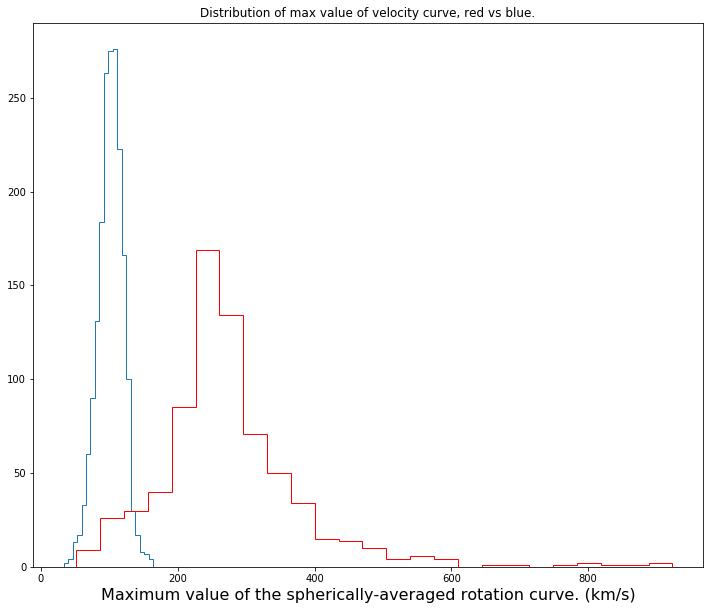

In [143]:
plt.figure(figsize=(12,10))
plt.hist(blue_cut_mass['SubhaloVmax'], bins = 20, histtype = 'step')
plt.hist(red_cut_mass['SubhaloVmax'], bins = 25, histtype = 'step', color="red")   
plt.title("Distribution of max value of velocity curve, red vs blue.")
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=16)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


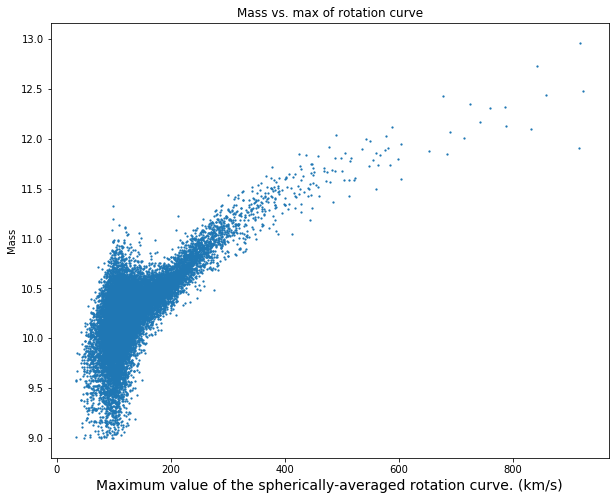

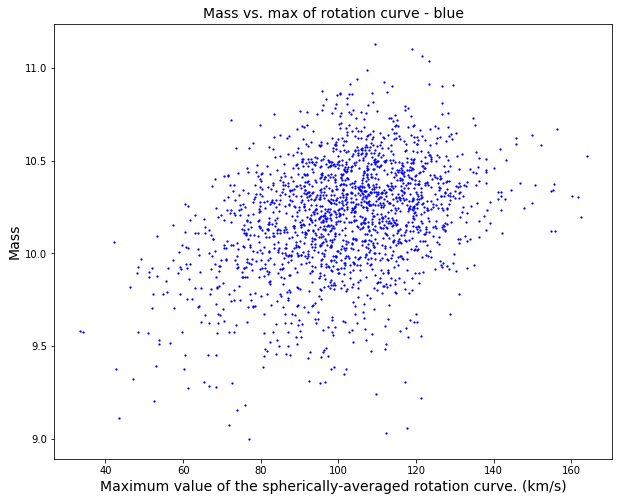

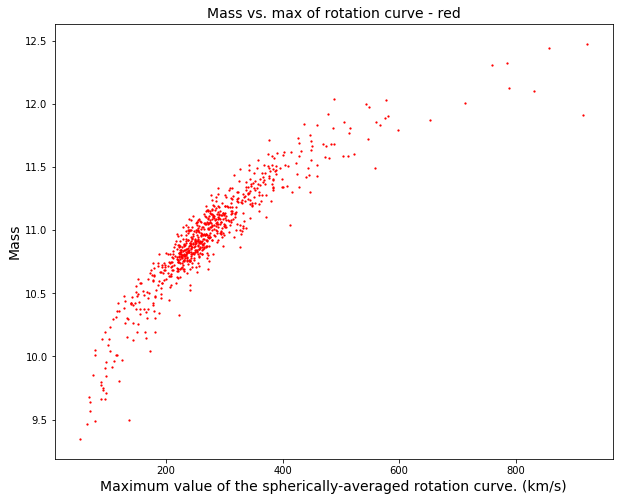

In [149]:
plt.figure(figsize=(10,8))
vtable = cut(pre_masscut, 'SubhaloMassInHalfRad', 9)
mass = (np.log10(vtable["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(vtable['SubhaloVmax'], mass, s=1.5)
plt.title("Mass vs. max of rotation curve")
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=14)
plt.ylabel("Mass")
plt.show()

plt.figure(figsize=(10,8))
mass = (np.log10(blue_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(blue_cut_mass['SubhaloVmax'], mass, s=1.5, color = "blue")
plt.title("Mass vs. max of rotation curve - blue", fontsize=14)
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=14)
plt.ylabel("Mass", fontsize=14)
plt.show()

plt.figure(figsize=(10,8))
mass = (np.log10(red_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(red_cut_mass['SubhaloVmax'], mass, s=1.5, color = "red")
plt.title("Mass vs. max of rotation curve - red", fontsize=14)
plt.xlabel("Maximum value of the spherically-averaged rotation curve. (km/s)", fontsize=14)
plt.ylabel("Mass", fontsize=14)
plt.show()


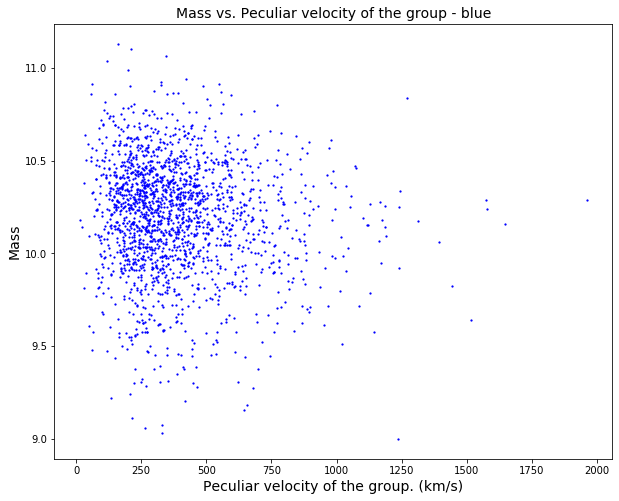

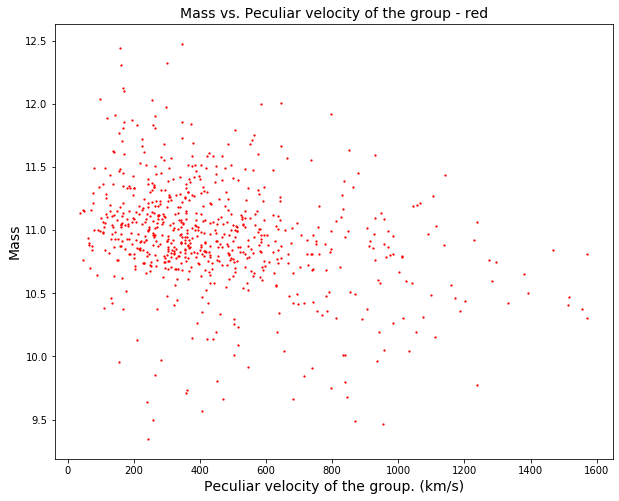

In [154]:
plt.figure(figsize=(10,8))
mass = (np.log10(blue_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(np.linalg.norm(blue_cut_mass['SubhaloVel'], axis=1), mass, s=1.5, color = "blue")
plt.title("Mass vs. Peculiar velocity of the group - blue", fontsize=14)
plt.xlabel("Peculiar velocity of the group. (km/s)", fontsize=14)
plt.ylabel("Mass", fontsize=14)
plt.show()

plt.figure(figsize=(10,8))
mass = (np.log10(red_cut_mass["SubhaloMassInHalfRad"]*1e10/0.704))
plt.scatter(np.linalg.norm(red_cut_mass['SubhaloVel'], axis=1), mass, s=1.5, color = "red")
plt.title("Mass vs. Peculiar velocity of the group - red", fontsize=14)
plt.xlabel("Peculiar velocity of the group. (km/s)", fontsize=14)
plt.ylabel("Mass", fontsize=14)
plt.show()

In [153]:
np.linalg.norm(blue_cut_mass['SubhaloVel'], axis=1)


array([ 810.72394,  760.64014, 1444.1958 , ...,  401.28162,  250.87357,
        709.36163], dtype=float32)